In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.alert import Alert

In [145]:
# 경고창 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_excel('./reviewdata/KOBIS_역대_박스오피스(통합전산망_집계_기준)_2023-05-10.xlsx', engine='openpyxl', header=4)
df

,순위,영화명,개봉일,매출액,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,명량,2014-07-30,135758658810,17615919,1587,188726,한국,한국,(주)씨제이이엔엠
1,2,극한직업,2019-01-23,139655543516,16266338,2003,292816,한국,한국,(주)씨제이이엔엠
2,3,신과함께-죄와 벌,2017-12-20,115727528087,14414658,1912,214631,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
3,4,국제시장,2014-12-17,110947621230,14264478,1044,212705,한국,한국,(주)씨제이이엔엠
4,5,어벤져스: 엔드게임,2019-04-24,122492181020,13977602,2835,246433,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
...,...,...,...,...,...,...,...,...,...,...
196,197,비긴 어게인,2014-08-13,27433947031,3479444,525,87565,미국,미국,판씨네마(주)
197,198,태풍,2005-12-14,22209675300,3471150,481,47155,한국,한국,CJ ENM
198,199,킹콩,2005-12-14,21476688172,3470059,319,38456,미국,미국,UIP코리아
199,200,부러진 화살,2012-01-18,25938096000,3460212,530,71607,한국,한국,(주)넥스트엔터테인먼트월드(NEW)


In [4]:
df.drop([200], axis=0, inplace=True)

In [139]:
mlist = df['영화명']
mlist

0               명량
1             극한직업
2        신과함께-죄와 벌
3             국제시장
4       어벤져스: 엔드게임
          ...     
195    해리 포터와 불의 잔
196         비긴 어게인
197             태풍
198             킹콩
199         부러진 화살
Name: 영화명, Length: 200, dtype: object

In [6]:
mlist[5]

'겨울왕국 2'

In [198]:
base_url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query='
driver = webdriver.Chrome()
driver.get(base_url)

In [200]:
sup_url = f'{mlist[1]}+평점'
url = base_url + sup_url
driver.get(url)
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')

In [57]:
# driver.find_element(By.XPATH, '//*[@id="nx_query"]').click()
# time.sleep(1)

# webdriver.ActionChains(driver).key_down(Keys.CONTROL).send_keys("a").perform()
# time.sleep(1)


# driver.find_element(By.XPATH, '//*[@id="nx_query"]').send_keys(f'{mlist[0]} 평점' + Keys.ENTER)
# time.sleep(1)

In [202]:
# 영화명
mname = mlist[1]

# 평점

In [205]:
# 전체 평점
tot_score = float(soup.select('.area_star_number')[0].get_text())
tot_score

9.56

In [206]:
# 남자 평점
man_score = float(soup.select('.area_star_number')[1].get_text())
man_score

9.54

In [207]:
# 여자 평점
girl_score = float(soup.select('.area_star_number')[2].get_text())
girl_score

9.67

# 나이별 만족도

In [208]:
# 10대 만족도
age10 = soup.select('.area_graph_age > li')[0].select('.area_text_age')[0].get_text()
age10_score = float(soup.select('.area_graph_age > li')[0].select('.this_text_num')[0].get_text())
print(age10, age10_score)

10대 10.0


In [209]:
# 20대 만족도
age20 = soup.select('.area_graph_age > li')[1].select('.area_text_age')[0].get_text()
age20_score = float(soup.select('.area_graph_age > li')[1].select('.this_text_num')[0].get_text())
print(age20, age20_score)

20대 9.5


In [210]:
# 30대 만족도
age30 = soup.select('.area_graph_age > li')[2].select('.area_text_age')[0].get_text()
age30_score = float(soup.select('.area_graph_age > li')[2].select('.this_text_num')[0].get_text())
print(age30, age30_score)

30대 9.5


In [211]:
# 40대 만족도
age40 = soup.select('.area_graph_age > li')[3].select('.area_text_age')[0].get_text()
age40_score = float(soup.select('.area_graph_age > li')[3].select('.this_text_num')[0].get_text())
print(age40, age40_score)

40대 10.0


In [212]:
# 50대 만족도
age50 = soup.select('.area_graph_age > li')[4].select('.area_text_age')[0].get_text()
age50_score = float(soup.select('.area_graph_age > li')[4].select('.this_text_num')[0].get_text())
print(age50, age50_score)

50대 0.0


# 평점 리뷰 긁기(공감순-상위 20개)

In [213]:
time.sleep(1)
driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[2]/div/div[1]/ul/li[2]/a').click()

time.sleep(1)
driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[4]/div/div/div/div/ul/li[1]/a').click()

time.sleep(1)
driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[6]').click()

for i in range(7):
    webdriver.ActionChains(driver).send_keys(Keys.PAGE_DOWN).perform()
    time.sleep(1)

In [217]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/113.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="다크 나이트 라이즈 평점 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'다크 나이트 라이즈 평점'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'다크 나이트 라이즈 평점'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>다크 나이트 라이즈 평점 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearc
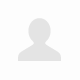
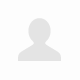

In [218]:
soup

In [225]:
# 리뷰 20개 미만 처리
min = len(soup.select('.area_card_outer._item_wrapper > li'))
min

16

In [219]:
soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[0].select('.desc')[0].get_text()

'안 본 사람은 있어도, 한 번 본사람은 없을듯 '

In [220]:
soup.select('.area_card_outer._item_wrapper > li .area_text_box')[0].get_text().split(')')[1]

'9'

In [227]:
review_list = []

try:
    for cnt in range(0,20):
        rev = soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
        rev_score = int(soup.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
        review_list.append(rev_score)
        review_list.append(rev)
except:
    for cnt in range(0,min):
        rev = soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
        rev_score = int(soup.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
        review_list.append(rev_score)
        review_list.append(rev)
review_list

[9,
 '안 본 사람은 있어도, 한 번 본사람은 없을듯 ',
 10,
 '시리즈가 있는 영화 중들에 배트맨 시리즈가 제일 완벽한 것 같다 ',
 9,
 '재개봉하여 다시봤는데 옛날에봤던거와는 다른 느낌으로 잘보았습니다. ',
 10,
 '빠른전개와 긴장감 넘치는 음향.... 눈과귀를 잠시도 쉴수없게 만든다~ ',
 10,
 '재개봉으로 다시봐도명작! ',
 10,
 '무슨 말이 필요합니까  배트맨 포레버 ',
 10,
 '재개봉해주셔서 감사합니다 ',
 10,
 '재개봉이지만 다시 봐도 너무 재밌었어요~ ',
 9,
 '반전감있는 스토리도좋고~ 너무나 매력있는 캣우먼~ 보는내내 안구정화가 되네요 ',
 10,
 '너무 재밋어요... 복선 꼭 알아야함 ',
 10,
 '집에서 보고 영화관가서 또 시청했는데 몇번을 봐도 재밋음 ',
 10,
 '말이 필요 없는 영화입니다. ',
 10,
 '언제봐도 최고의 영화! ',
 10,
 '재개봉 해줘서 고맙습니다^^ ',
 8,
 ' ',
 8,
 '오랜만에 보니 대규모 액션씬은 뭔가 좀 아쉬움이 느껴졌다. 그러나 충분히 잘만든 영화 ',
 9,
 '안 본 사람은 있어도, 한 번 본사람은 없을듯 ',
 10,
 '시리즈가 있는 영화 중들에 배트맨 시리즈가 제일 완벽한 것 같다 ',
 9,
 '재개봉하여 다시봤는데 옛날에봤던거와는 다른 느낌으로 잘보았습니다. ',
 10,
 '빠른전개와 긴장감 넘치는 음향.... 눈과귀를 잠시도 쉴수없게 만든다~ ',
 10,
 '재개봉으로 다시봐도명작! ',
 10,
 '무슨 말이 필요합니까  배트맨 포레버 ',
 10,
 '재개봉해주셔서 감사합니다 ',
 10,
 '재개봉이지만 다시 봐도 너무 재밌었어요~ ',
 9,
 '반전감있는 스토리도좋고~ 너무나 매력있는 캣우먼~ 보는내내 안구정화가 되네요 ',
 10,
 '너무 재밋어요... 복선 꼭 알아야함 ',
 10,
 '집에서 보고 영화관가서 또 시청했는데 몇번을 봐도 재밋음 ',
 10,
 '말이 필요 없는 영화입니다. ',
 10,

In [123]:
print(review_list[0], review_list[1])

10 진짜 뻥안치고 ㅈㄴ 웃겼다 


In [134]:
data = pd.DataFrame(columns = ['영화명', '관람객 평점', '남자 평점', '여자 평점', '10대 평점', '20대 평점', '30대 평점',
  '40대 평점', '50대 평점', '리뷰 평점', '리뷰'])
new_row = {'영화명':mname, '관람객 평점':tot_score,
           '남자 평점':man_score, '여자 평점':girl_score,
           '10대 평점':age10_score, '20대 평점':age20_score,
           '30대 평점':age30_score, '40대 평점':age40_score,
           '50대 평점':age50_score, '리뷰 평점':review_list[0], '리뷰':review_list[1]}
data = data.append(new_row,ignore_index=True)
data

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7812\2599729886.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row,ignore_index=True)


,영화명,관람객 평점,남자 평점,여자 평점,10대 평점,20대 평점,30대 평점,40대 평점,50대 평점,리뷰 평점,리뷰
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,진짜 뻥안치고 ㅈㄴ 웃겼다


In [136]:
data = pd.DataFrame(columns = ['영화명', '관람객 평점', '남자 평점', '여자 평점', '10대 평점', '20대 평점', '30대 평점',
  '40대 평점', '50대 평점', '리뷰 평점', '리뷰'])
data

,영화명,관람객 평점,남자 평점,여자 평점,10대 평점,20대 평점,30대 평점,40대 평점,50대 평점,리뷰 평점,리뷰


In [137]:
for cnt in range(0,20):
    rev = soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
    rev_score = int(soup.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
    new_row = {'영화명':mname, '관람객 평점':tot_score,
           '남자 평점':man_score, '여자 평점':girl_score,
           '10대 평점':age10_score, '20대 평점':age20_score,
           '30대 평점':age30_score, '40대 평점':age40_score,
           '50대 평점':age50_score, '리뷰 평점':rev_score, '리뷰':rev}
    data = data.append(new_row, ignore_index=True)
data

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7812\2041329773.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7812\2041329773.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7812\2041329773.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7812\2041329773.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
C:\U

,영화명,관람객 평점,남자 평점,여자 평점,10대 평점,20대 평점,30대 평점,40대 평점,50대 평점,리뷰 평점,리뷰
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,진짜 뻥안치고 ㅈㄴ 웃겼다
1,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,"계속 웃으면서 봤어요!""지금까지 이런맛은 없었다이것은 갈비인가 통닭인가수원왕갈비통닭..."
2,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,완전 내스타일.. 류승룡 영화 요즘 말아먹더니 이번엔 대박 웃기네 ㅋㅋ역시 갓승룡
3,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,9,자꾸 광고할떄 치킨치킨 거리길래 뭔말인가 했더만..ㅋㅋㅋ치킨먹고싶네
4,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,올해 가장 재미있었다 아직까진
5,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,ㅠㅠ진짜웃곀ㅋㅋㅋ 또볼꺼야ㅠㅠㅠ
6,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,8,신선하고 재밌었습니다!
7,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,8,엄마랑 재밌게 봤어요 시간 후딱가요
8,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,생각보다 너무 재미있었습니다 진선규님 코믹연기도 너무 잘하셔서 놀랐네요
9,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,8,재밌게 봤습니다 웃음코드가 빵빵떠지네요


# 런타임

In [165]:
time.sleep(1)
driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[1]/div[3]/div/div/ul/li[2]/a').click()

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')


[]

In [183]:
soup.select('.detail_info > dl')[0].select('div')[4].get_text().strip().split(' ')[1]

'111분'

# 역대 TOP 200

In [ ]:
data = pd.DataFrame(columns = ['영화명', '개봉일', '런타임', '관람객 평점', '남자 평점', '여자 평점',
                               '10대 평점', '20대 평점', '30대 평점', '40대 평점', '50대 평점',
                               '리뷰 평점', '리뷰'])

base_url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query='
driver = webdriver.Chrome()
driver.get(base_url)

ec = 0

for top in range(0, 200):
    try:
        sup_url = f'영화+{mlist[top]}+평점'
        url = base_url + sup_url
        driver.get(url)
        req = requests.get(url)
        soup = BeautifulSoup(req.text, 'html.parser')

        # 영화명
        mname = mlist[top]
        print(f'{top+1}위 {mname}')

        # 기본정보 클릭
        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[1]/div[3]/div/div/ul/li[2]/a').click()

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        
        # 개봉일
        date = soup.select('.detail_info > dl')[0].select('div')[0].get_text().strip().split(' ')[1]
        print(date)
        
        # 러닝타임
        runtime = soup.select('.detail_info > dl')[0].select('div')[4].get_text().strip().split(' ')[1]
        
        # 평점 클릭
        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[1]/div[3]/div/div/ul/li[4]/a').click()
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        
        # 전체 평점
        tot_score = float(soup.select('.area_star_number')[0].get_text())
        # 남자 평점
        man_score = float(soup.select('.area_star_number')[1].get_text())
        # 여자 평점
        girl_score = float(soup.select('.area_star_number')[2].get_text())

        # 10대 만족도
        age10_score = float(soup.select('.area_graph_age > li')[0].select('.this_text_num')[0].get_text())
        # 20대 만족도
        age20_score = float(soup.select('.area_graph_age > li')[1].select('.this_text_num')[0].get_text())
        # 30대 만족도
        age30_score = float(soup.select('.area_graph_age > li')[2].select('.this_text_num')[0].get_text())
        # 40대 만족도
        age40_score = float(soup.select('.area_graph_age > li')[3].select('.this_text_num')[0].get_text())
        # 50대 만족도
        age50_score = float(soup.select('.area_graph_age > li')[4].select('.this_text_num')[0].get_text())

        # 공감순 리뷰 페이지 내리기
        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[2]/div/div[1]/ul/li[2]/a').click()

        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[4]/div/div/div/div/ul/li[1]/a').click()

        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[6]').click()

        for i in range(7):
            webdriver.ActionChains(driver).send_keys(Keys.PAGE_DOWN).perform()
            time.sleep(1)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        time.sleep(1)
        
        # 리뷰 20개 미만 처리
        min = len(soup.select('.area_card_outer._item_wrapper > li'))

        # 상위 리뷰 20개 추출
        try:
            for cnt in range(0,20):
                rev = soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
                rev_score = int(soup.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
                new_row = {'영화명':mname, '개봉일':date, '런타임':runtime, '관람객 평점':tot_score,
                       '남자 평점':man_score, '여자 평점':girl_score,
                       '10대 평점':age10_score, '20대 평점':age20_score,
                       '30대 평점':age30_score, '40대 평점':age40_score,
                       '50대 평점':age50_score, '리뷰 평점':rev_score, '리뷰':rev}
                data = data.append(new_row, ignore_index=True)
            time.sleep(1)
            print(f'댓글 : {cnt+1}개')
        except:
            for cnt in range(0,min):
                rev = soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
                rev_score = int(soup.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
                new_row = {'영화명':mname, '개봉일':date, '런타임':runtime, '관람객 평점':tot_score,
                       '남자 평점':man_score, '여자 평점':girl_score,
                       '10대 평점':age10_score, '20대 평점':age20_score,
                       '30대 평점':age30_score, '40대 평점':age40_score,
                       '50대 평점':age50_score, '리뷰 평점':rev_score, '리뷰':rev}
                data = data.append(new_row, ignore_index=True)
            time.sleep(1)
            print(f'댓글 : {cnt+1}개')
    except:
        ec = ec + 1
        print(f'--------{mname} Error-------{ec}개')
        continue
        
data.to_csv('./reviewsample0511.csv', index=False)

1위 명량
2014.07.30.
댓글 : 20개
2위 극한직업
2019.01.23.
댓글 : 20개
3위 신과함께-죄와 벌
2017.12.20.
댓글 : 20개
4위 국제시장
2014.12.17.
댓글 : 20개
5위 어벤져스: 엔드게임
2019.04.24.
댓글 : 20개
6위 겨울왕국 2
2019.11.21.
댓글 : 20개
7위 베테랑
2015.08.05.
댓글 : 20개
8위 아바타
2022.12.14.
댓글 : 20개
9위 도둑들
2012.07.25.
댓글 : 20개
10위 7번방의 선물
2013.01.23.
댓글 : 20개
11위 알라딘
1993.07.03.
댓글 : 20개
12위 암살
2015.07.22.
댓글 : 20개
13위 범죄도시2
2022.05.18.
댓글 : 20개
14위 광해, 왕이 된 남자
2012.09.13.
댓글 : 20개
15위 신과함께-인과 연
2018.08.01.
댓글 : 20개
16위 택시운전사
2017.08.02.
댓글 : 20개
17위 부산행
2020.07.15.
댓글 : 20개
18위 변호인
2013.12.18.
댓글 : 20개
19위 해운대
2009.07.22.
댓글 : 20개
20위 어벤져스: 인피니티 워
2018.04.25.
댓글 : 20개
21위 괴물
2006.07.27.
댓글 : 20개
22위 아바타: 물의 길
2022.12.14.
댓글 : 20개
23위 왕의 남자
2005.12.29.
댓글 : 20개
24위 어벤져스: 에이지 오브 울트론
2015.04.23.
댓글 : 10개
25위 인터스텔라
2014.11.06.
댓글 : 20개
26위 기생충
2019.05.30.
댓글 : 20개
27위 겨울왕국
애니메이션,
--------겨울왕국 Error-------1개
28위 보헤미안 랩소디
2018.10.31.
댓글 : 20개
29위 검사외전
2016.02.03.
댓글 : 20개
30위 엑시트
--------엑시트 Error-------2개
31위 설국열차
2013.08.01.
댓글 : 20개
32위 관상
2013.0

In [234]:
data

,영화명,개봉일,런타임,관람객 평점,남자 평점,여자 평점,10대 평점,20대 평점,30대 평점,40대 평점,50대 평점,리뷰 평점,리뷰
0,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,10,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
1,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,9,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
2,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,10,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
3,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,10,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
4,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,8,전쟁씬에서 입벌리고봄
5,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,10,우리나라에서도이런해상전투씬이 나오다니 압권이다 더불어 이순신장군님의 위대함까지 다시...
6,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,10,안봤으면 후회할 영화! 안볼수 없었더 영화! 모두가 봤으면 하는 영화!
7,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,10,올해 최고의 수작. 성웅 이순신 그는 위대한 조선의 장수
8,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,10,장면 하나하나가 소름이고 감동.. ㅜㅜ 이런 영화가 천만이 넘어야함
9,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,10,영화보는 동안 줄곧 든 생각 한가지. 정말 고생 많았을듯. 잘보고 감동받고 갑니다.


In [191]:
data.shape

(3616, 12)

In [192]:
data.to_csv('./reviewsample.csv', index=False)